In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/notebook':
  os.chdir(r'/home/notebook')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_500/906830468.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.10/importlib/_bootstrap.py": 1700493245.0, "/usr/lib/python3.10/importlib/_bootstrap_external.py": 1700493245.0, "/usr/lib/python3.10/codecs.py": 1700493245.0, "/usr/lib/python3.10/encodings/aliases.py": 1700493245.0, "/usr/lib/python3.10/encodings/__init__.py": 1700493245.0, "/usr/lib/python3.10/encodings/utf_8.py": 1700493245.0, "/usr/lib/python3.10/abc.py": 1700493245.0, "/usr/lib/python3.10/io.py": 1700493245.0, "/usr/lib/python3.10/stat.py": 1700493245.0, "/usr/lib/python3.10/_collections_abc.py": 1700493245.0, "/usr/lib/python3.10/genericpath.py": 1700493245.0, "/usr/lib/python3.10/posixpath.py": 1700493245.0, "/usr/lib/python3.10/os.py": 1700493245.0, "/usr/lib/python3.10/_sitebuiltins.py": 1700493245.0, "/usr/lib/python3.10/sitecustomize.py": 1700493245.0, "/usr/lib/python3.10/site.py": 1700493245.0, "/usr/lib/python3.10/warnings.py": 1700493245.0, "/usr/lib/python3.10/importlib/__init__.py": 1700493245.0, "/usr/lib/python3.10/importlib/machinery.py": 1700493

/tmp/ipykernel_500/906830468.py:33: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
project_name = "Test"

In [3]:
print(project_name)

Test


In [4]:
from sklearn import datasets
from time import sleep
from datetime import datetime

iris = datasets.load_iris()

# datetime object containing current date and time
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 26/01/2024 09:27:26


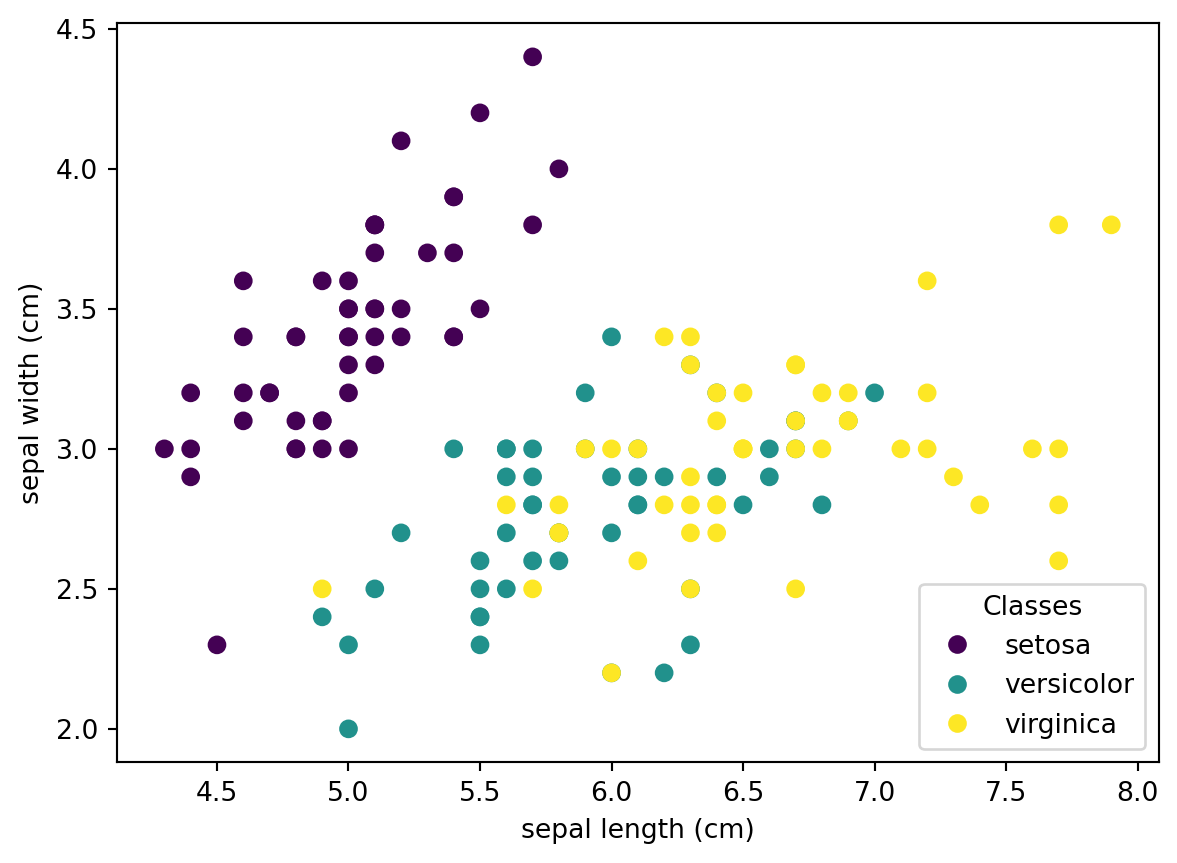

In [5]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)